# Intelligent Vehicle Health Monitoring System: Optimizing Performance and Safety with Machine Learning

## Author: Mr. Chandan D. Chaudhari
###  GITHUB: https://github.com/chandanc5525/BearingFault_Detection

In [1]:
# Installing Neccessary Pyhton Libraries
!pip install researchpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


In [4]:
## Importing Python Neccesory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max.columns", None)
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import researchpy as rp

In [5]:
## Importing Dataset using Pandas Function
data = pd.read_csv(r'https://raw.githubusercontent.com/chandanc5525/BearingFault_Detection/main/without_debris.csv')
df= data.sample(frac=1)    # This command will shuffle the data
df

,NO,RPM,X_ACC,Y_ACC,Z_ACC,OUTPUT
1937,1938,1000,327,400,304,0
446,447,1000,339,399,324,1
8364,8365,3000,226,400,367,1
450,451,1000,332,403,332,1
1363,1364,1000,339,410,336,0
...,...,...,...,...,...,...
1535,1536,1000,325,401,334,0
4702,4703,2000,554,387,355,1
4577,4578,2000,241,405,341,1
2353,2354,1500,543,394,344,1


In [6]:
# Checking Number of Rows and Columns in Data
df.shape

(10542, 6)

In [7]:
# Checking the Descriptive Statistics
df.describe()

,NO,RPM,X_ACC,Y_ACC,Z_ACC,OUTPUT
count,10542.000000,10542.000000,10542.000000,10542.000000,10542.000000,10542.000000
mean,5271.500000,2018.212863,378.121040,397.399829,332.574559,0.490514
std,3043.357603,708.380394,102.864503,10.454466,25.243628,0.499934
min,1.000000,1000.000000,56.000000,309.000000,221.000000,0.000000
25%,2636.250000,1500.000000,324.000000,394.000000,322.000000,0.000000
50%,5271.500000,2000.000000,339.000000,399.000000,334.000000,0.000000
75%,7906.750000,2500.000000,398.000000,403.000000,346.000000,1.000000
max,10542.000000,3000.000000,784.000000,456.000000,427.000000,1.000000


In [8]:
# Checking for Datatypes and Null values in Dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10542 entries, 1937 to 7770
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NO      10542 non-null  int64
 1   RPM     10542 non-null  int64
 2   X_ACC   10542 non-null  int64
 3   Y_ACC   10542 non-null  int64
 4   Z_ACC   10542 non-null  int64
 5   OUTPUT  10542 non-null  int64
dtypes: int64(6)
memory usage: 576.5 KB


In [9]:
# checking nature of the dataset
rp.summarize(df)

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,NO,10542,5271.5,5271.5,9262025.5,3043.3576,29.6409,NO
1,RPM,10542,2018.2129,2000.0,501802.7825,708.3804,6.8993,RPM
2,X_ACC,10542,378.121,339.0,10581.1059,102.8645,1.0019,X_ACC
3,Y_ACC,10542,397.3998,399.0,109.2959,10.4545,0.1018,Y_ACC
4,Z_ACC,10542,332.5746,334.0,637.2408,25.2436,0.2459,Z_ACC
5,OUTPUT,10542,0.4905,0.0,0.2499,0.4999,0.0049,OUTPUT


In [10]:
# Creating a Crosstab between 'RPM' and 'OUTPUT'

cross_tab = pd.crosstab(df['RPM'], df['OUTPUT'])
cross_tab

OUTPUT,0,1
RPM,,
1000,1215,865
1500,906,1054
2000,1088,1104
2500,1104,1012
3000,1058,1136


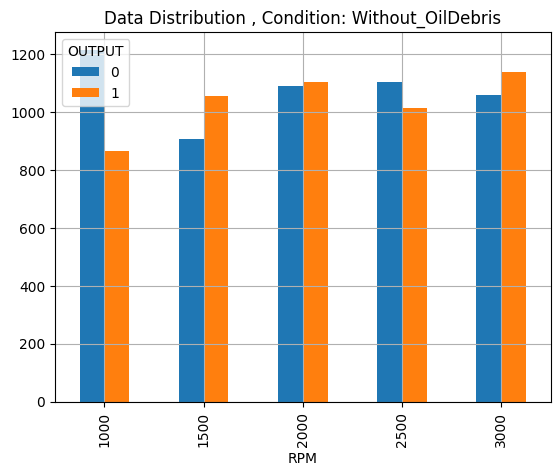

In [11]:
# Data Visualization of Crosstab information
# Note: 1 Stands for Faulty Bearing and 0 Stands for Non Faulty Bearing
cross_tab.plot(kind='bar')
plt.title('Data Distribution , Condition: Without_OilDebris')
plt.grid()
plt.show()

## Machine Learning Technique for Model Prediction

Evaluating Random Forest...

Accuracy - Random Forest: 0.8283
Precision - Random Forest: 0.8462
Recall - Random Forest: 0.7608
F1 Score - Random Forest: 0.8012



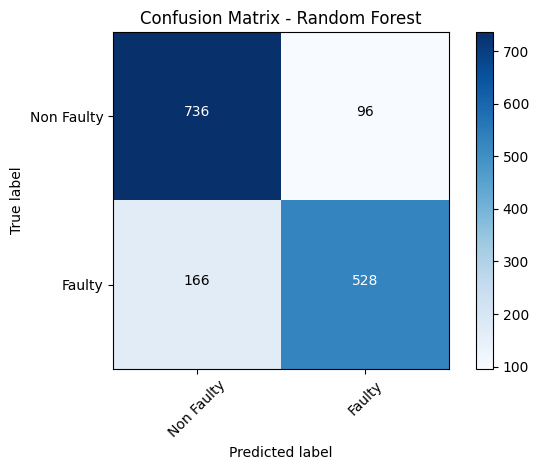

Evaluating Logistic Regression...

Accuracy - Logistic Regression: 0.7090
Precision - Logistic Regression: 0.7921
Recall - Logistic Regression: 0.4885
F1 Score - Logistic Regression: 0.6043



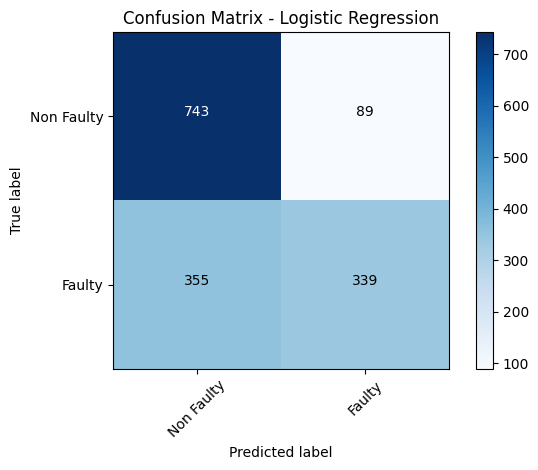

Evaluating Decision Tree...

Accuracy - Decision Tree: 0.7693
Precision - Decision Tree: 0.7515
Recall - Decision Tree: 0.7363
F1 Score - Decision Tree: 0.7438



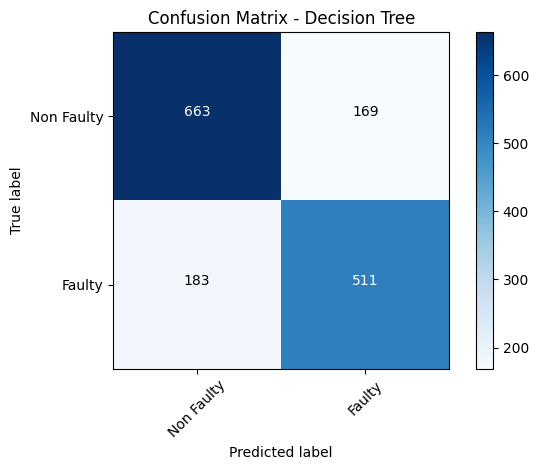

Evaluating K-Nearest Neighbors...

Accuracy - K-Nearest Neighbors: 0.8178
Precision - K-Nearest Neighbors: 0.8281
Recall - K-Nearest Neighbors: 0.7565
F1 Score - K-Nearest Neighbors: 0.7907



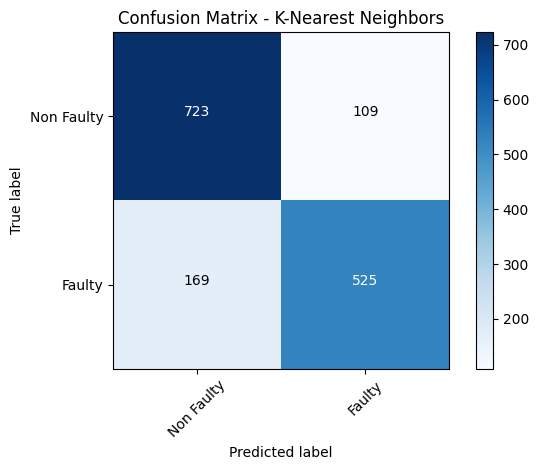

Evaluating Ensemble...

Accuracy - Ensemble: 0.8047
Precision - Ensemble: 0.8153
Recall - Ensemble: 0.7378
F1 Score - Ensemble: 0.7746



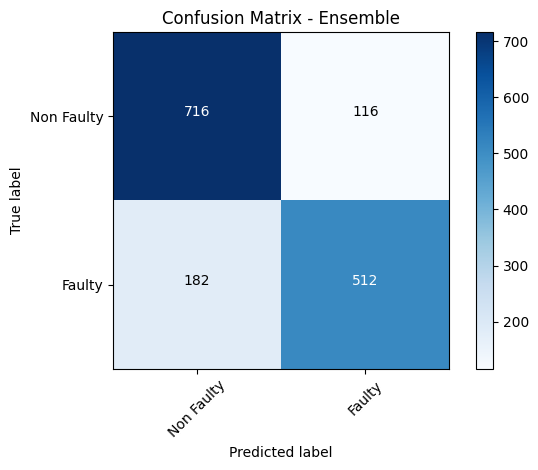

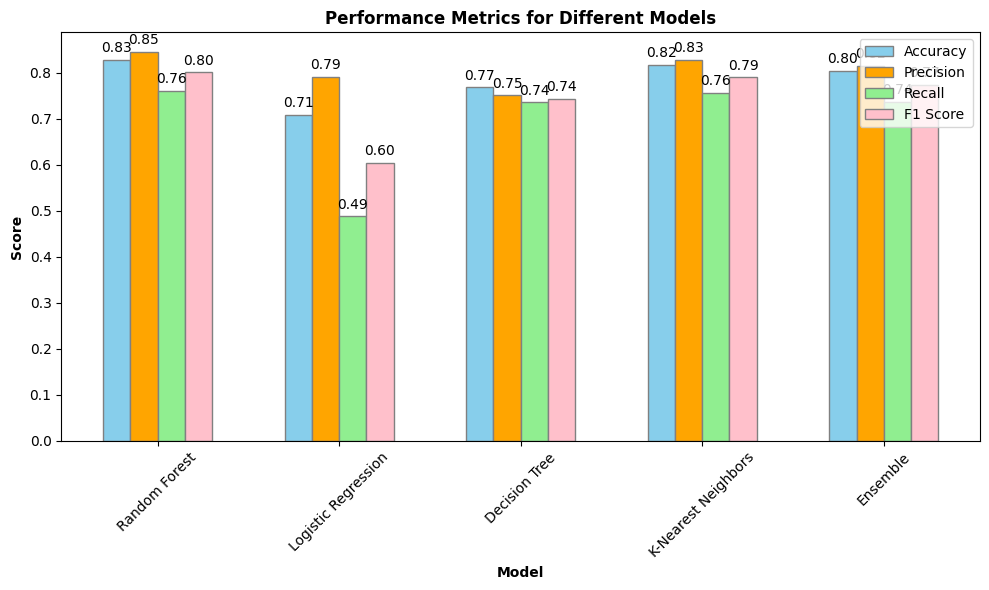

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats

# Load your dataset here
# Assuming 'df' is your DataFrame with 'RPM', 'X_ACC', 'Y_ACC', 'Z_ACC' as independent variables and 'OUTPUT' as the target variable

# Removing outliers using IQR method
def remove_outliers(df):
    Q1 = df[['RPM', 'X_ACC', 'Y_ACC', 'Z_ACC']].quantile(0.25)
    Q3 = df[['RPM', 'X_ACC', 'Y_ACC', 'Z_ACC']].quantile(0.75)
    IQR = Q3 - Q1
    filtered_entries = ~((df[['RPM', 'X_ACC', 'Y_ACC', 'Z_ACC']] < (Q1 - 1.5 * IQR)) | (df[['RPM', 'X_ACC', 'Y_ACC', 'Z_ACC']] > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[filtered_entries]

df = remove_outliers(df)

# Splitting data into independent variables (X) and target variable (y)
X = df[['RPM', 'X_ACC', 'Y_ACC', 'Z_ACC']]
y = df['OUTPUT']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining preprocessing steps (scaling)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['RPM', 'X_ACC', 'Y_ACC', 'Z_ACC'])
    ])

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Ensemble': VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                                             ('lr', LogisticRegression(random_state=42)),
                                             ('dt', DecisionTreeClassifier(random_state=42)),
                                             ('knn', KNeighborsClassifier())], voting='soft')
}

# Lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Train models and evaluate
for name, model in models.items():
    print(f"Evaluating {name}...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Performance Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Print performance metrics
    print(f"\nAccuracy - {name}: {accuracy:.4f}")
    print(f"Precision - {name}: {precision:.4f}")
    print(f"Recall - {name}: {recall:.4f}")
    print(f"F1 Score - {name}: {f1:.4f}\n")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.colorbar()
    tick_marks = np.arange(len(set(y)))
    plt.xticks(tick_marks, ['Non Faulty', 'Faulty'], rotation=45)
    plt.yticks(tick_marks, ['Non Faulty', 'Faulty'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
    plt.show()

# Plot bar plots
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(10, 6))
barWidth = 0.15

r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, accuracy_list, color='skyblue', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_list, color='orange', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r3, recall_list, color='lightgreen', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r4, f1_list, color='pink', width=barWidth, edgecolor='grey', label='F1 Score')

# Add labels and legend
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + 1.5*barWidth for r in range(len(models))], models.keys(), rotation=45)
plt.ylabel('Score', fontweight='bold')
plt.title('Performance Metrics for Different Models', fontweight='bold')
plt.legend()
plt.tight_layout()

# Add values on bars
for i in range(len(models)):
    plt.text(i, accuracy_list[i] + 0.01, f"{accuracy_list[i]:.2f}", ha='center', va='bottom')
    plt.text(i + barWidth, precision_list[i] + 0.01, f"{precision_list[i]:.2f}", ha='center', va='bottom')
    plt.text(i + 2*barWidth, recall_list[i] + 0.01, f"{recall_list[i]:.2f}", ha='center', va='bottom')
    plt.text(i + 3*barWidth, f1_list[i] + 0.01, f"{f1_list[i]:.2f}", ha='center', va='bottom')

plt.show()

In [13]:
# Hyper parameter tuning technique
models = {'LogisticRegression':LogisticRegression(),
          'RandomForestClassifier':RandomForestClassifier(),
          'KNNClassifier':KNeighborsClassifier()}

def evaluate(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    # Creating One Dictionary to Save Model Score
    model_score = {}
    for name,model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

model_score = evaluate(models = models ,X_train = X_train,X_test = X_test,y_train = y_train,y_test = y_test)
model_score

{'LogisticRegression': 0.709043250327654,
 'RandomForestClassifier': 0.8283093053735255,
 'KNNClassifier': 0.8217562254259502}

In [14]:
# Evaluate model based on hyper parameters
rf = RandomForestClassifier()
rf.get_params()   # Checking Various Parameters for RandomForestClassifier

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [16]:
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
rf_grid = { 'n_estimators': np.arange(10,1000,50),
            'max_depth': [None,3,5,10],
            'min_samples_leaf': np.arange(2,20,2),
            'min_samples_split': np.arange(1,20,2)
           }

np.random.seed(42)

randomforest = RandomizedSearchCV(RandomForestClassifier(),param_distributions = rf_grid,cv =5, n_iter = 20,verbose= True)
randomforest.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [17]:
# Best Hyper parameter estimates
randomforest.best_params_   # Best Parameter for RandomForestClassifier Model 

{'n_estimators': 310,
 'min_samples_split': 7,
 'min_samples_leaf': 6,
 'max_depth': None}

In [18]:
# Best Accuracy of the model
randomforest.score(X_test,y_test)

0.8368283093053736

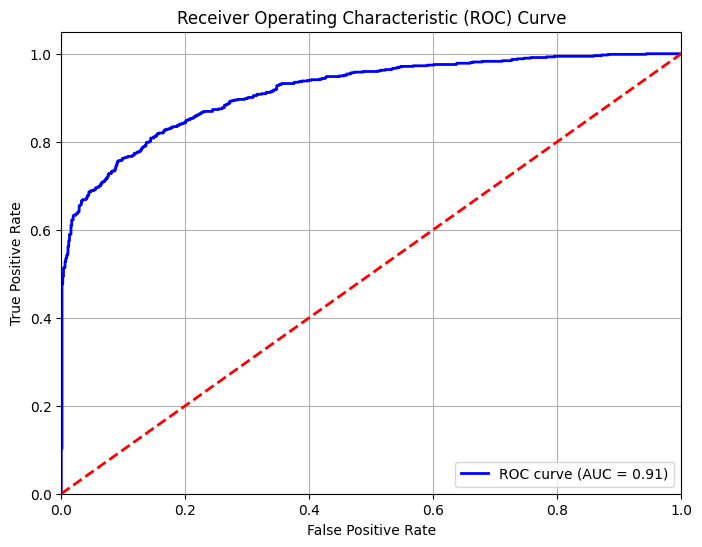

In [21]:
# Plotting ROC and AUC Curve
from sklearn.metrics import roc_curve, auc

# Assuming you have trained a RandomForestClassifier named 'randomforest'
# and you have test data X_test and corresponding labels y_test

# Get predicted probabilities for the positive class
y_prob = randomforest.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

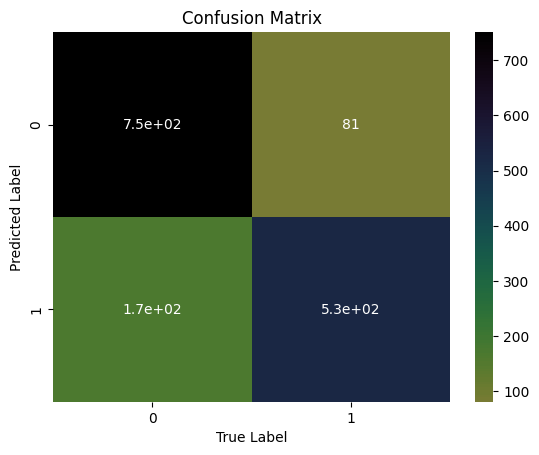

In [22]:
# Building Confusion Matrix for Random Forest

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='cubehelix_r',center=0)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

## USing Cross Validation Technique to evaluate Model Performance

In [25]:
cv_acc = cross_val_score(randomforest,X,y,cv = 5,scoring = 'accuracy')
cv_prec = cross_val_score(randomforest,X,y,cv = 5,scoring = 'precision')
cv_recall = cross_val_score(randomforest,X,y,cv = 5,scoring = 'recall')
cv_f1 = cross_val_score(randomforest,X,y,cv = 5,scoring = 'f1')


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 

In [27]:
print(f'CV Accuracy Score : {np.mean(cv_acc)*100:.2f} %')
print(f'CV Precision Score : {np.mean(cv_prec)*100:.2f} %')
print(f'CV Recall Score : {np.mean(cv_recall)*100:.2f} %')
print(f'CV F1 Score : {np.mean(cv_f1)*100:.2f} %')

CV Accuracy Score : 83.36 %
CV Precision Score : 86.18 %
CV Recall Score : 75.02 %
CV F1 Score : 80.20 %


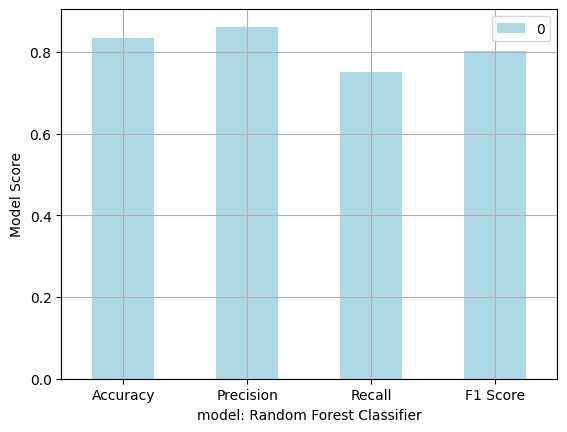

In [28]:
CrossvalidationData = pd.DataFrame({'Accuracy':np.mean(cv_acc),
                                    'Precision':np.mean(cv_prec),
                                    'Recall':np.mean(cv_recall),
                                    'F1 Score':np.mean(cv_f1)
                                     },index = [0])
CrossvalidationData.T.plot(kind='bar',color = 'lightblue')
plt.xticks(rotation=0)
plt.xlabel('model: Random Forest Classifier')
plt.ylabel('Model Score')
plt.grid()
plt.show()